# Student Score Prediction using Linear Regression

Name: Pooja Baburaj

In [70]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

## Data Collection

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [56]:
df #Dataset has no missing values

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Visualization

In [57]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF4C75F850>,
      dtype=object)

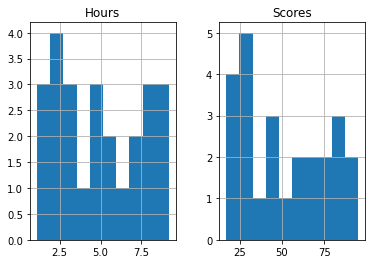

In [11]:
df.hist()

Text(0, 0.5, 'Scores')

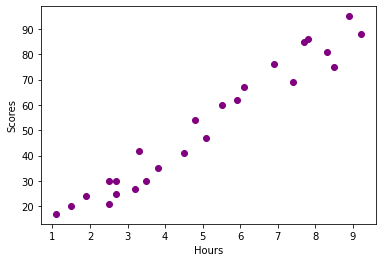

In [14]:
plt.scatter(df.Hours, df.Scores,  color='purple')
plt.xlabel("Hours")
plt.ylabel("Scores")






## Splitting the Dataset into Test and Train sets

In [36]:
import numpy as np

In [58]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

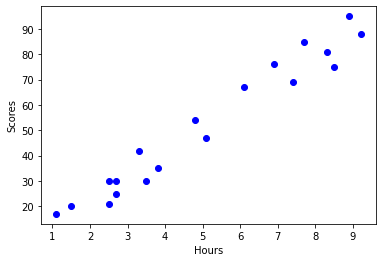

In [59]:
plt.scatter(train.Hours, train.Scores, color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

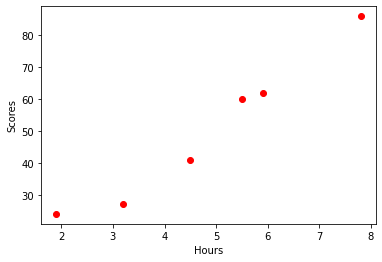

In [60]:
plt.scatter(test.Hours, test.Scores, color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Training the Model

In [61]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
xTrain = np.asanyarray(train[['Hours']])
yTrain = np.asanyarray(train[['Scores']])
lr.fit(xTrain,yTrain)

LinearRegression()

In [62]:
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[9.55132432]]
Intercept:  [3.43669492]


Text(0, 0.5, 'Scores')

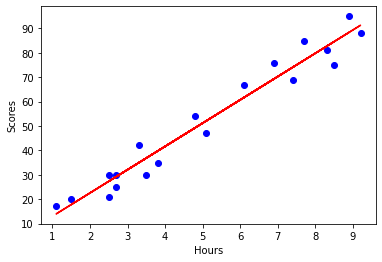

In [63]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(xTrain, lr.coef_[0][0]*xTrain + lr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

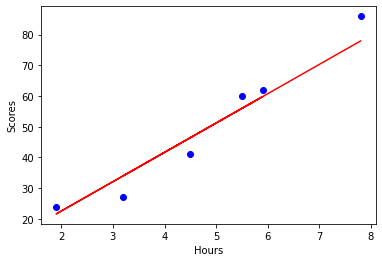

In [64]:
xTest = np.asanyarray(test[['Hours']])
yTest = np.asanyarray(test[['Scores']])
yPred = lr.predict(xTest)
plt.scatter(xTest, yTest,  color='blue')
plt.plot(xTest, yPred, '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

In [69]:
df = pd.DataFrame({"Actual Score": yTest.flatten(),"Predicted Score":yPred.flatten()})
df

,Actual Score,Predicted Score
0,27,34.000933
1,60,55.968979
2,62,59.789508
3,41,46.417654
4,24,21.584211
5,86,77.937025


## Model Evaluation

In [65]:
from sklearn.metrics import r2_score

In [66]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yPred - yTest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yPred - yTest) ** 2))
print("R2-score: %.2f" % r2_score(yPred , yTest) )

Mean absolute error: 4.86
Residual sum of squares (MSE): 28.39
R2-score: 0.91


### Predicted score if a student study for 9.25 hrs in a day

In [67]:
yPredScore = lr.predict([[9.25]])
print("Predicted Score: ",yPredScore[0][0])

Predicted Score:  91.78644484827043


Text(0, 0.5, 'Scores')

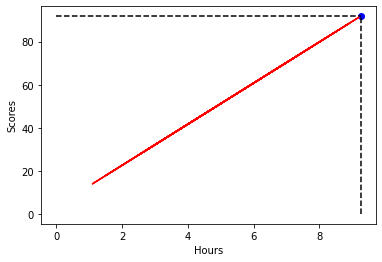

In [68]:
x = [[9.25]]
plt.plot(xTrain, lr.coef_[0][0]*xTrain + lr.intercept_[0], '-r')
plt.scatter(x, yPredScore, color= 'blue')
plt.vlines(x, 0, yPredScore, linestyle="dashed")
plt.hlines(yPredScore, 0, x, linestyle="dashed")
plt.xlabel("Hours")
plt.ylabel("Scores")